In [ ]:
from SmartHandDataset import SmartHandDataset
import matplotlib.pyplot as plt
from typing import Optional, Tuple, Dict, Iterable, List, Union
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [5]:
MAT_PATH = "smarthand_dataset.mat"
def decode_matlab_strings(arr: np.ndarray) -> List[str]:
    """
    Decode MATLAB cell-array-of-char to Python strings efficiently.

    Args:
        arr: MATLAB cell array containing character arrays or strings.

    Returns:
        List of decoded strings.

    Example:
        Input: array([['b', 'a', 'l', 'l'], ['c', 'u', 'p']])
        Output: ['ball', 'cup']
    """
    return ["".join(o.tolist()) if isinstance(o, np.ndarray) else str(o) 
            for o in arr.flatten()]

# Frames and Classes

In [6]:
data = sio.loadmat(MAT_PATH)
X = data['tactile_data'].astype(np.float32)  # shape (num_samples, num_taxels, num_timepoints)
threshold = data["threshold"].flatten().astype(np.float32)
valid = data["valid_flag"].flatten().astype(bool)
y = data["object_id"].flatten().astype(np.int64)
sessions = data["session_id"].flatten().astype(np.int64)
objects = decode_matlab_strings(data["objects"])
mask = np.ones(X.shape[0], dtype=bool)
mask &= valid
tactile = X[mask]
y = y[mask]
sessions = sessions[mask]

# build a tidy dataframe for plotting
df = pd.DataFrame({
    "object_id": y,
    "session": sessions
})
df["object"] = df["object_id"].map(lambda oid: objects[int(oid)])

## Frames per Object

/var/folders/cb/rpqxqpss457blh7xkvkmwp280000gn/T/ipykernel_5704/786712244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="object", palette="viridis")


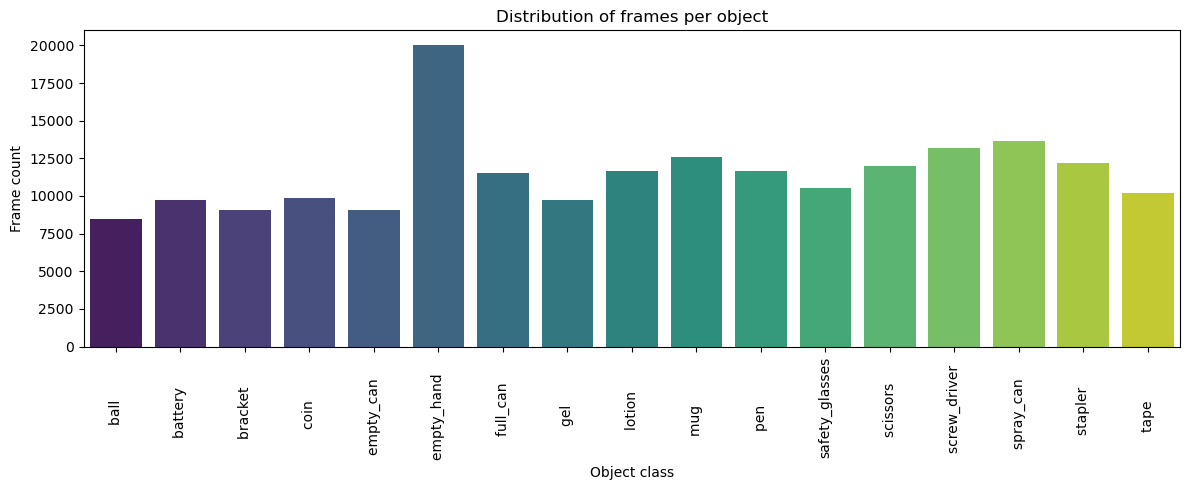

In [7]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x="object", palette="viridis")

# thinner bars with space
for p in ax.patches:
    p.set_width(0.8)  # default 0.8; reduce for more spacing

ax.set_title("Distribution of frames per object")
ax.set_xlabel("Object class"); ax.set_ylabel("Frame count")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(); plt.show()


## Frames per Session

/var/folders/cb/rpqxqpss457blh7xkvkmwp280000gn/T/ipykernel_5704/2621374920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="session", palette="magma")


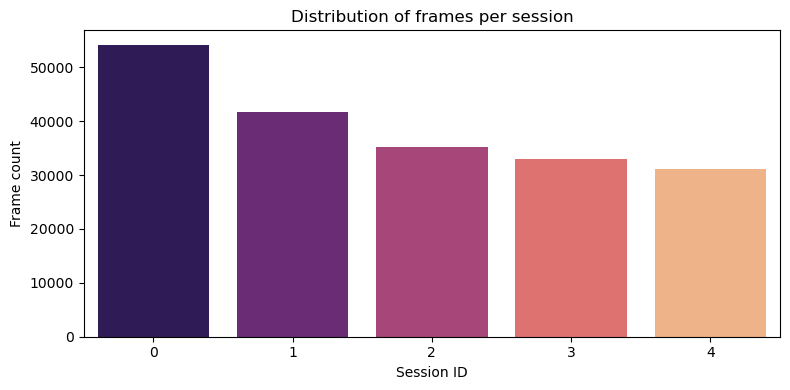

In [8]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="session", palette="magma")

for p in ax.patches:
    p.set_width(0.8)

ax.set_title("Distribution of frames per session")
ax.set_xlabel("Session ID"); ax.set_ylabel("Frame count")
plt.tight_layout(); plt.show()


## Frames per object split by session

Session 0: Minimum frame count is 2564 for object 'gel           '
Session 1: Minimum frame count is 1271 for object 'ball          '
Session 2: Minimum frame count is 1391 for object 'battery       '
Session 3: Minimum frame count is 1252 for object 'bracket       '
Session 4: Minimum frame count is 1153 for object 'battery       '


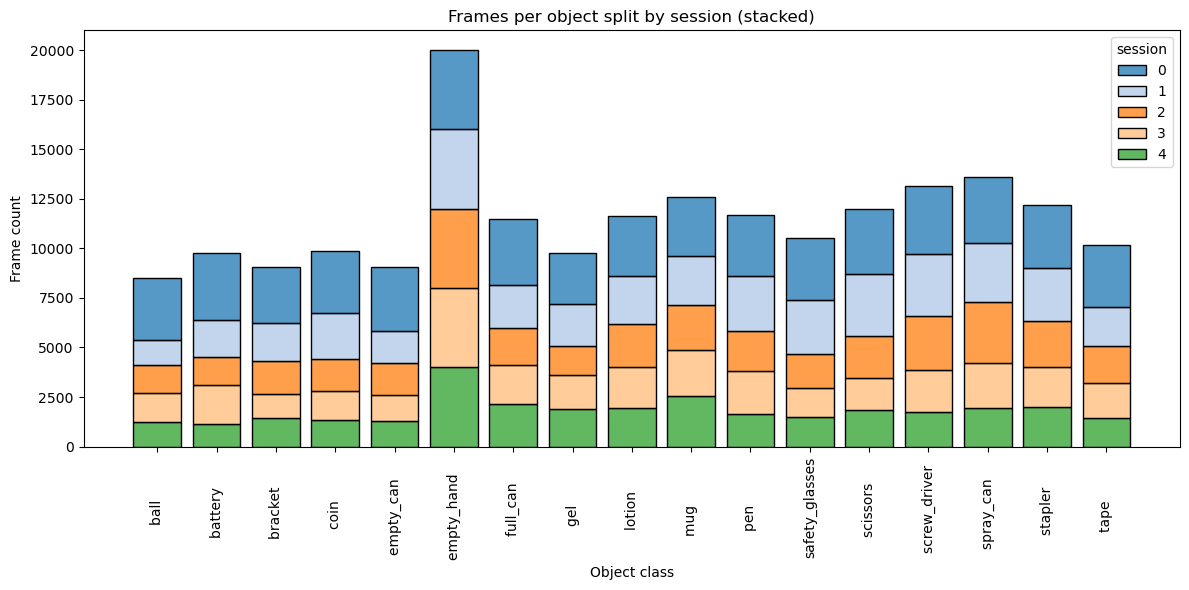

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df,
    x="object",
    hue="session",
    multiple="stack",
    shrink=0.8,          # <— adds space between category bars
    palette="tab20"
)

ax.set_title("Frames per object split by session (stacked)")
ax.set_xlabel("Object class"); ax.set_ylabel("Frame count")
plt.xticks(rotation=90, ha="center")

# Compute and print the number of frames for the class with the minimum frames in each session
frame_counts = df.groupby(['session', 'object']).size().reset_index(name='frame_count')
for session in frame_counts['session'].unique():
    session_data = frame_counts[frame_counts['session'] == session]
    min_frames = session_data['frame_count'].min()
    min_object = session_data[session_data['frame_count'] == min_frames]['object'].iloc[0]
    print(f"Session {session}: Minimum frame count is {min_frames} for object '{min_object}'")

plt.tight_layout(); plt.show()